In [267]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path=Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing=load_housing_data()

In [268]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [269]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [270]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

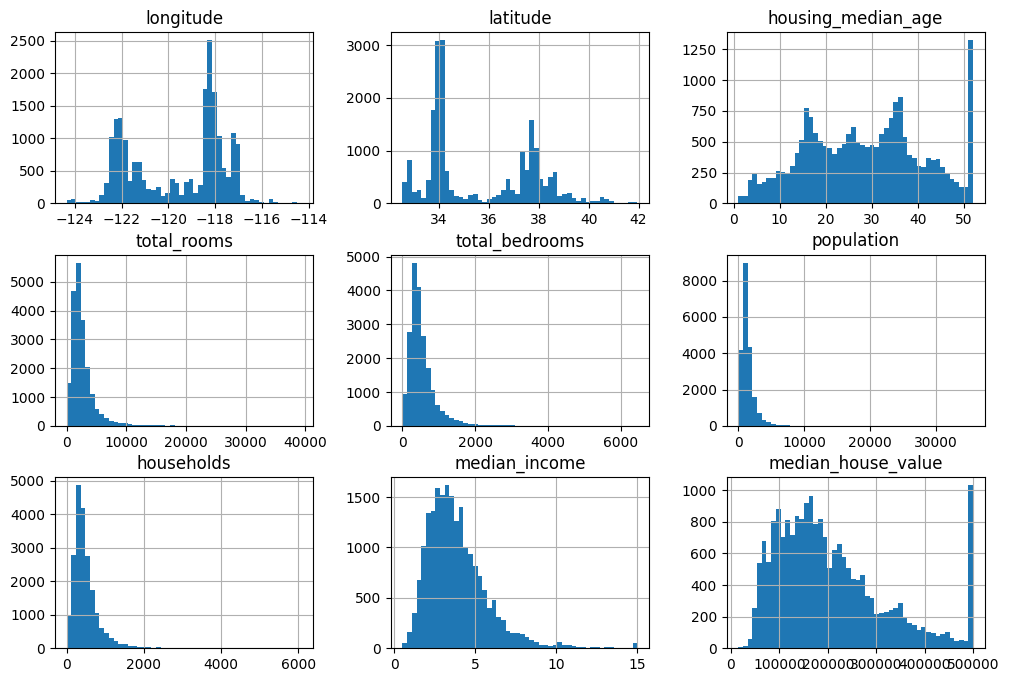

In [271]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [272]:
from scipy.stats import skew
import pandas as pd

# Example dataset (use your housing dataset)
features = ["longitude", "latitude", "housing_median_age", 
            "total_rooms", "total_bedrooms", "population", 
            "households", "median_income", "median_house_value"]

# Compute skewness for each feature
skewness_values = housing[features].apply(skew)
print(skewness_values)
#	•	Features with skewness > 1 or < -1 are highly 
# skewed and typically benefit from log transformation.

longitude            -0.297780
latitude              0.465919
housing_median_age    0.060326
total_rooms           4.147042
total_bedrooms             NaN
population            4.935500
households            3.410190
median_income         1.646537
median_house_value    0.977692
dtype: float64


In [273]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [274]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set=shuffle_and_split_data(housing, 0.2)
len(train_set)
    

16512

In [275]:
len(test_set)

4128

In [276]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32
def split_data_with_id_hash(data, test_ratio, id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
housing_with_id=housing.reset_index()
train_set, test_set=split_data_with_id_hash(housing_with_id,0.2,"index")


In [277]:
len(test_set)

4128

In [278]:
housing_with_id["id"]=housing["longitude"]*1000+housing["latitude"]
train_set, test_set=split_data_with_id_hash(housing_with_id,0.2,"id")

In [279]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

In [280]:
housing["income_cat"]=pd.cut(housing["median_income"], bins=[0,1.5,3.0,4.5,6.0,np.inf],
labels=[1,2,3,4,5])


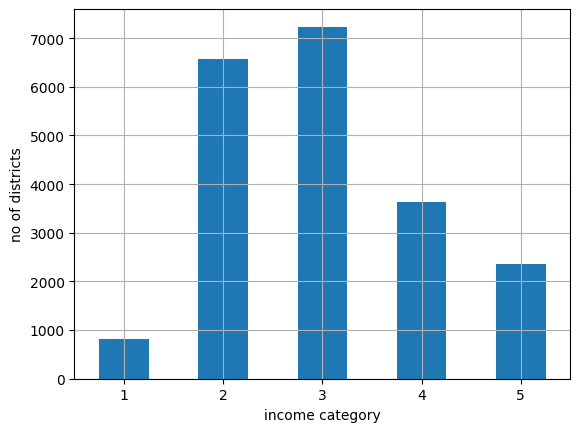

In [281]:
import matplotlib.pyplot as plt
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("income category")
plt.ylabel("no of districts")
plt.show()

In [282]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [283]:
housing_with_id=housing.copy()

In [284]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42) #splitter.split() method in StratifiedShuffleSplit returns a 
#generator that produces a pair of train and test indices for each split
strat_splits=[]
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n=housing.iloc[test_index]
    strat_splits.append((strat_train_set_n,strat_test_set_n))
    



In [285]:
strat_splits

[(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  13096    -122.42     37.80                52.0       3321.0          1115.0   
  14973    -118.38     34.14                40.0       1965.0           354.0   
  3785     -121.98     38.36                33.0       1083.0           217.0   
  14689    -117.11     33.75                17.0       4174.0           851.0   
  20507    -118.15     33.77                36.0       4366.0          1211.0   
  ...          ...       ...                 ...          ...             ...   
  14207    -118.40     33.86                41.0       2237.0           597.0   
  13105    -119.31     36.32                23.0       2945.0           592.0   
  19301    -117.06     32.59                13.0       3920.0           775.0   
  19121    -118.40     34.06                37.0       3781.0           873.0   
  19888    -122.41     37.66                44.0        431.0           195.0   
  
         population  hous

In [286]:
type(strat_splits)

list

In [287]:
len(strat_splits)

10

In [288]:
#example code 
# import pandas as pd
# from sklearn.model_selection import StratifiedShuffleSplit

# # Create a mock dataset
# data = {
#     "feature1": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#     "feature2": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     "income_cat": [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]  # Target variable for stratification
# }

# housing = pd.DataFrame(data)

# # Define the splitter
# splitter = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=42)

# # Perform the split
# for train_index, test_index in splitter.split(housing, housing["income_cat"]):
#     print("Train Indices:", train_index)
#     print("Test Indices:", test_index)
    


# Advantages of `StratifiedShuffleSplit` over `train_test_split`

`StratifiedShuffleSplit` is particularly useful when dealing with **imbalanced classes** or when maintaining class distributions in splits is crucial. Here's a detailed comparison:

---

## **Advantages of `StratifiedShuffleSplit`**

### 1. **Preserves Class Proportions**
- Ensures that the **class distribution** in the target variable is the same in both the training and test sets as in the original dataset.
- This is critical for imbalanced datasets, where some classes have significantly fewer samples than others.

**Example**:
- Original dataset: Class 0 (50%), Class 1 (30%), Class 2 (20%).
- **StratifiedSplit Result**:
  - Training set: Class 0 (50%), Class 1 (30%), Class 2 (20%).
  - Test set: Class 0 (50%), Class 1 (30%), Class 2 (20%).
- **Random Split (`train_test_split`)**:
  - Training set: Class 0 (60%), Class 1 (25%), Class 2 (15%).
  - Test set: Class 0 (30%), Class 1 (50%), Class 2 (20%).

---

### 2. **Consistency Across Multiple Splits**
- `StratifiedShuffleSplit` allows multiple **consistent splits**, ensuring stratification is maintained across all splits.
- Useful for **cross-validation** or testing different models on multiple random splits.

---

### 3. **Better for Imbalanced Datasets**
- Guarantees that even minority classes are adequately represented in both the training and test sets.
- Without stratification, minority classes might be underrepresented or missing entirely.

---

### 4. **Reproducibility**
- When a **random seed** (`random_state`) is provided, `StratifiedShuffleSplit` ensures consistent stratified splits across runs, making experiments reproducible.

---

### 5. **Customizable Splits**
- `StratifiedShuffleSplit` allows control over:
  - **Number of splits** (`n_splits`).
  - **Test set size** (`test_size`).
  - **Training set size** (`train_size`).
- Useful for tasks like fine-tuning or validation, especially in limited data scenarios.

---

## **When to Use `StratifiedShuffleSplit`**
1. **Imbalanced Classes**: Target variable has an uneven class distribution.
2. **Small Datasets**: Ensures that each class is represented in both training and test sets.
3. **Cross-Validation**: Need multiple stratified splits for robust model evaluation.
4. **Reproducibility**: Want consistent splits with specific class distributions.

---

## **Comparison Table**

| Feature                          | `train_test_split`                       | `StratifiedShuffleSplit`                  |
|----------------------------------|------------------------------------------|-------------------------------------------|
| **Maintains Class Proportions**  | Not guaranteed.                          | Always ensures class proportions.         |
| **Multiple Splits**              | Not directly supported.                  | Supports \( n\_splits \) for cross-validation. |
| **Imbalanced Datasets**          | Risk of missing minority classes.        | Guarantees representation of all classes. |
| **Customization**                | Limited (test/train size only).          | Highly customizable (test/train size, splits). |
| **Reproducibility**              | Possible with `random_state`, but random. | Ensures consistent stratified splits.     |

---

## **Conclusion**
- Use **`StratifiedShuffleSplit`** when class distribution matters, such as in **classification tasks** or with **imbalanced datasets**.
- Use **`train_test_split`** for quick and simple splits when stratification is not a concern or when the dataset is large and well-balanced.


In [289]:
strat_train_set, strat_test_set= strat_splits[0]


In [290]:
housing=strat_train_set.copy()

In [291]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [292]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3,4.511933,0.230891,2.058473


In [293]:
housing_numeric = housing.drop(columns=["ocean_proximity"])
corr_matrix=housing_numeric.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
income_cat            0.642887
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [294]:
housing=strat_train_set.drop("median_house_value", axis=1)
housing_labels=strat_train_set["median_house_value"].copy()


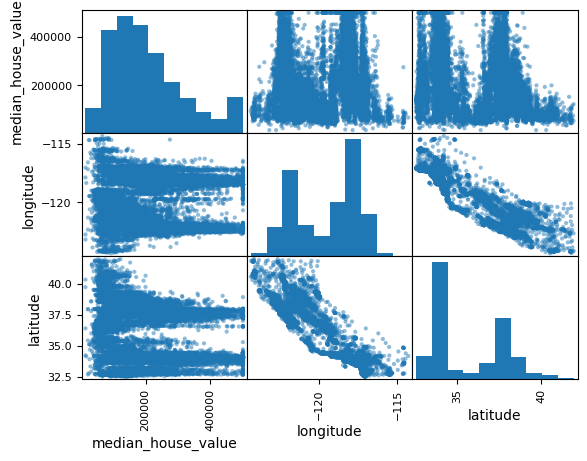

In [360]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value", "longitude", "latitude"]
scatter_matrix(housing_with_id[attributes])
plt.show()

In [295]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,3


In [296]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [297]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [298]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [299]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [300]:
X=imputer.transform(housing_num)
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [301]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [302]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [303]:
housing_tr["ocean_proximity"]=housing["ocean_proximity"]

In [304]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [305]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [306]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [307]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [308]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [309]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [310]:
df_test=pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [311]:
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY


In [312]:
pd.get_dummies(housing_cat)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,False,False,False,True,False
14973,True,False,False,False,False
3785,False,True,False,False,False
14689,False,True,False,False,False
20507,False,False,False,False,True
...,...,...,...,...,...
14207,True,False,False,False,False
13105,False,True,False,False,False
19301,False,False,False,False,True
19121,True,False,False,False,False


In [313]:
cat_encoder.transform(df_test).toarray() #it already learned the other categories so even if there is new data it can work pretty well

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Handling New Categories in OneHotEncoder

### **Key Points**

1. **True**: 
   - If `handle_unknown="ignore"` is set, the `OneHotEncoder` can handle new (unseen) categories in the test data gracefully.
   - It uses the categories learned during training to encode the test data and ignores any new categories by encoding them as all zeros (`[0. 0. 0.]`).

2. **False**:
   - Without setting `handle_unknown="ignore"` (default behavior), encountering new categories in the test data will raise an error.
   - **Error Example**:
     ```
     ValueError: Found unknown categories in column 0 during transform
     ```

3. **Best Practices**:
   - **Set `handle_unknown="ignore"`**:
     - Always set this parameter if you expect new categories in the test data. It ensures robustness by avoiding errors.
   - **Inspect `categories_`**:
     - Check the categories learned during training by accessing the `categories_` attribute of the encoder.
   - **Test for Unseen Categories**:
     - Ensure your data pipeline accounts for potential unseen categories in the test data.

### **Code Example**

```python
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Training data
train = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY", "NEAR OCEAN"]})
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(train)

# Test data with a new category
test = pd.DataFrame({"ocean_proximity": ["NEAR BAY", "INLAND", "ISLAND"]})
test_encoded = encoder.transform(test)

print(encoder.categories_)  # Categories learned from training data
print(test_encoded.toarray())  # Transformed test data

[array(['INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]
[[0. 1. 0.]  # NEAR BAY
 [1. 0. 0.]  # INLAND
 [0. 0. 0.]]  # ISLAND (unknown, all zeros because of `handle_unknown="ignore"`)

In [314]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scalar.fit_transform(housing_num)

In [315]:
from sklearn.preprocessing import StandardScaler
std_scalar=StandardScaler()
housing_num_std_scaled=std_scalar.fit_transform(housing_num)

In [316]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35=rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [317]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [318]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
target_scalar=StandardScaler()
scaled_labels=target_scalar.fit_transform(housing_labels.to_frame())

model=LinearRegression()
model.fit(housing[["median_income"]],scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5]

scaled_predictions=model.predict(some_new_data)
predictions=target_scalar.inverse_transform(scaled_predictions)



In [319]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [320]:
from sklearn.compose import TransformedTargetRegressor

model=TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions=model.predict(some_new_data)

In [321]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

In [322]:
from sklearn.preprocessing import FunctionTransformer
log_transformer= FunctionTransformer(np.log, inverse_func=np.exp)
log_pop =log_transformer.transform(housing[["population"]])

In [323]:
# Check the minimum and maximum values of a feature
min_value = housing["population"].min()
max_value = housing["population"].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 3.0
Maximum value: 16305.0


In [324]:
rbf_transformer=FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.5]], gamma=0.1))
age_simil_36=rbf_transformer.transform(housing[["housing_median_age"]])

In [325]:
age_simil_36.min()

np.float64(2.0328217158405596e-52)

In [326]:
sf_coords= 37.7749, -122.41
sf_transformer=FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simi=sf_transformer.transform(housing[["latitude", "longitude"]])
sf_simi

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [327]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean=with_mean
    def fit(self, X, y=None):
        X=check_array(X)
        self.mean=X.mean(axis=0)
        self.scale=X.std(axis=0)
        self.n_features_in=X.shape[1]
        return self
    def transform(self, X):
        check_is_fitted(self)
        X=check_array(X)
        assert self.n_features_in_== X.shape[1]
        if self.with_mean:
            X=X - self.mean_
        return X/ self.scale_
        
        

# Explanation of `StandardScalerClone` Implementation

This document provides a detailed explanation of the custom `StandardScalerClone` class implemented in Python, which mimics the functionality of scikit-learn's `StandardScaler`.

## Step-by-Step Explanation

### 1. `__init__` Method
```python
def __init__(self, with_mean=True):
    self.with_mean = with_mean
```
- **Purpose**: Initializes the `StandardScalerClone` object and sets the `with_mean` attribute.
- **Behavior**:
  - `with_mean` is a parameter that determines whether the mean should be subtracted during scaling.
  - Default value is `True`.

---

### 2. `fit` Method
```python
def fit(self, X, y=None):
    X = check_array(X)  # Validate and convert input data.
    self.mean_ = X.mean(axis=0)  # Compute the mean of each feature (column).
    self.scale_ = X.std(axis=0)  # Compute the standard deviation of each feature.
    self.n_features_in_ = X.shape[1]  # Store the number of features (columns).
    return self
```
- **Purpose**: Fits the scaler to the data \( X \). This means it calculates the `mean_` and `scale_` (standard deviation) for each feature, which will later be used to transform the data.
- **Key Steps**:
  1. `check_array(X)`: Ensures \( X \) is a valid NumPy array (handles pandas DataFrames and ensures no missing values or malformed data).
  2. `self.mean_`: Computes the mean of each feature (column-wise) and stores it.
  3. `self.scale_`: Computes the standard deviation of each feature (column-wise) and stores it.
  4. `self.n_features_in_`: Stores the number of features in \( X \) to ensure consistency during transformation.
  5. `return self`: Returns the fitted transformer for method chaining.

---

### 3. `transform` Method
```python
def transform(self, X):
    check_is_fitted(self)  # Ensure the transformer has been fitted.
    X = check_array(X)  # Validate and convert input data.
    assert self.n_features_in_ == X.shape[1], "Number of features is inconsistent."
    if self.with_mean:
        X = X - self.mean_  # Subtract the mean from each feature.
    return X / self.scale_  # Divide each feature by its standard deviation.
```
- **Purpose**: Transforms the input \( X \) using the computed `mean_` and `scale_` values.
- **Key Steps**:
  1. `check_is_fitted(self)`: Ensures that `fit` has been called before applying `transform`. If not, it raises an error.
  2. `check_array(X)`: Validates \( X \) to ensure it’s properly formatted (e.g., no missing values, correct data type).
  3. `assert self.n_features_in_ == X.shape[1]`: Checks that the number of features in \( X \) matches the number of features seen during `fit`. If not, raises an `AssertionError`.
  4. **Mean Subtraction**:
     - If `self.with_mean` is `True`, subtracts the mean of each feature from the corresponding feature values.
  5. **Scaling**:
     - Divides each feature by its standard deviation (stored in `self.scale_`).
  6. Returns the scaled data.

---

## Key Features and Behavior

### Why Use `check_array` and `check_is_fitted`?
- `check_array`: Ensures that the input \( X \) is valid, e.g., no missing values, and is in the correct format (NumPy array or similar).
- `check_is_fitted`: Confirms that the transformer has been fitted before calling `transform`. This is critical to avoid errors when calling `transform` without `fit`.

### Why Store `n_features_in_`?
- Ensures that the number of features in \( X \) during transformation matches the number of features seen during `fit`. This prevents errors caused by inconsistent input dimensions.

### Why Return `self` in `fit`?
- Allows method chaining, making the transformer compatible with scikit-learn pipelines.

---

## Example Usage
```python
import numpy as np

# Sample data
X_train = np.array([[1, 2], [3, 4], [5, 6]])
X_test = np.array([[7, 8], [9, 10]])

# Initialize and fit the scaler
scaler = StandardScalerClone(with_mean=True)
scaler.fit(X_train)

# Print computed mean and scale
print("Mean:", scaler.mean_)   # Output: [3. 4.]
print("Scale:", scaler.scale_) # Output: [1.63299316 1.63299316]

# Transform the test data
X_scaled = scaler.transform(X_test)
print("Transformed data:\n", X_scaled)
```

---

## Output Explanation
1. **Mean**: The mean of each column in `X_train`:
   \[
   \text{mean}_1 = (1 + 3 + 5) / 3 = 3, \quad \text{mean}_2 = (2 + 4 + 6) / 3 = 4
   \]

2. **Scale (Standard Deviation)**: The standard deviation of each column in `X_train`:
   \[
   \text{scale}_1 = \sqrt{\frac{(1-3)^2 + (3-3)^2 + (5-3)^2}{3}} \approx 1.63
   \]

3. **Transformed Data**:
   Each value in `X_test` is scaled using:
   \[
   X_{\text{scaled},ij} = \frac{X_{ij} - \text{mean}_j}{\text{scale}_j}
   \]


In [328]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10,gamma=1.0, random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight= sample_weight)
        return self
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
    #The use of self.kmeans_ (with a trailing underscore) instead of self.kmeans follows scikit-learn’s conventions for 
    # attributes that are learned from data during the fit process. 
    # This convention ensures clarity and consistency when working with scikit-learn estimators and transformers.

In [329]:
cluster_simil=ClusterSimilarity(n_clusters=10, gamma=1., random_state= 42)
similarities=cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)
similarities

array([[7.76542973e-17, 9.79800335e-01, 5.48714294e-08, ...,
        5.54756787e-01, 4.68660945e-14, 5.60181642e-01],
       [6.44368278e-01, 4.37928334e-13, 1.10563200e-01, ...,
        3.94562487e-17, 9.91430580e-01, 2.65430691e-10],
       [3.31752344e-17, 6.54513501e-01, 1.07069766e-08, ...,
        5.85660788e-01, 1.56121793e-14, 2.76994463e-01],
       ...,
       [1.20915228e-01, 2.94626804e-24, 8.21082019e-06, ...,
        9.05126434e-30, 2.27911432e-02, 2.57216447e-20],
       [6.54529515e-01, 2.83886458e-13, 1.06085724e-01, ...,
        2.31193217e-17, 9.95505588e-01, 1.85273211e-10],
       [2.52428219e-16, 9.68456695e-01, 1.35198859e-07, ...,
        4.42577246e-01, 1.42097447e-13, 6.51045403e-01]])

In [330]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

In [331]:

# Example dataset
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])

# Initialize the transformer
cluster_sim = ClusterSimilarity(n_clusters=2, gamma=0.5, random_state=42)
cluster_sim.fit(X)
transformed_X = cluster_sim.transform(X)

# Check output shape
print("Transformed shape:", transformed_X.shape)  # Should be (n_samples, n_clusters)

# Check transformed values
print("Transformed data:\n", transformed_X)
print(cluster_sim.get_feature_names_out())

Transformed shape: (5, 2)
Transformed data:
 [[1.83156389e-02 5.24288566e-22]
 [1.00000000e+00 1.38879439e-11]
 [1.83156389e-02 1.23409804e-04]
 [1.12535175e-07 3.67879441e-01]
 [2.31952283e-16 3.67879441e-01]]
['Cluster 0 similarity', 'Cluster 1 similarity']


In [332]:
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

In [333]:
from sklearn.pipeline import make_pipeline
num_pipeline=make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [334]:
housing_num_prepared= num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [335]:
transformed_df = pd.DataFrame(housing_num_prepared, columns=housing_num.columns)

In [336]:
transformed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [337]:
from sklearn.compose import ColumnTransformer

num_attributes=housing.select_dtypes(include=["number"]).columns.tolist()
cat_attributes=housing.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

cat_pipeline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessing= ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes)
])

**Alternative**

In [338]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing= make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

housing_prepared=preprocessing.fit_transform(housing)

In [339]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In [340]:
def column_ratio(X):
    return X[:, [0]]/ X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )
log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simil=ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing=ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], 
remainder=default_num_pipeline)

## **Why Use ClusterSimilarity for Latitude and Longitude?**

### **1. Geographic Patterns**
- Latitude and longitude represent geographic locations.
- Normal scaling (e.g., `StandardScaler`) treats them as independent numerical features, ignoring their spatial relationships.
- **Clustering** groups nearby locations into clusters, capturing geographic patterns (e.g., neighborhoods, regions).

### **2. Non-Linear Relationships**
- Geographic data often has non-linear relationships with the target variable (e.g., housing prices).
- Scaling alone cannot capture these non-linearities.
- **ClusterSimilarity** creates similarity scores that encode non-linear spatial relationships.

### **3. Feature Engineering**
- Raw latitude and longitude may not be meaningful predictors.
- **ClusterSimilarity** transforms them into meaningful features (e.g., proximity to cluster centers), improving model performance.

### **4. Avoiding Overfitting**
- Using raw coordinates can lead to overfitting, as the model might memorize specific locations.
- Clustering generalizes the data by grouping locations, reducing overfitting.

---

### **Example**
```python
# Without ClusterSimilarity
scaler = StandardScaler()
scaled_coords = scaler.fit_transform(df[["latitude", "longitude"]])

# With ClusterSimilarity
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
similarity_scores = cluster_simil.fit_transform(df[["latitude", "longitude"]])

and also try to plot a correaltion graph between all the features and target variable

In [341]:
housing_prepared=preprocessing.fit_transform(housing)
housing_prepared.shape
housing_prepared

array([[ 1.84662439, -0.86602737, -0.33020372, ...,  0.        ,
         1.86111875, -0.95468705],
       [-0.5081207 ,  0.0245495 , -0.25361631, ...,  0.        ,
         0.90762971,  1.89007821],
       [-0.20215476, -0.04119332, -0.05104091, ...,  0.        ,
         0.35142777, -0.95468705],
       ...,
       [-0.24249175, -0.10998748,  0.15854151, ...,  1.        ,
        -1.23772062, -0.00643196],
       [ 0.25977479, -0.36093745, -0.21033248, ...,  0.        ,
         0.66925745, -0.00643196],
       [ 3.61270996, -1.32397227,  0.04958379, ...,  1.        ,
         1.22545939, -0.00643196]])

In [342]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing, LinearRegression()) 
lin_reg.fit(housing, housing_labels)
housing_predictions=lin_reg.predict(housing) #only feed  housing in preprocessing pipeline while 
# labels are directly fed
housing_predictions[:8].round(-2)

array([250400., 395000., 127400.,  87900., 332800., 213900., 335000.,
       323800.])

In [343]:
housing_labels.iloc[:8].round(-2)

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
1286      92600.0
18078    349300.0
4396     440900.0
Name: median_house_value, dtype: float64

In [344]:
from sklearn.metrics import r2_score
r2 = r2_score(housing_labels, housing_predictions)
r2*100


64.91555900873847

The model will fit perfectly on the training data (if it’s a simple model like linear regression and there is no noise in the data), but it does not guarantee 100% accuracy. For example, if the data has noise, outliers, or non-linear relationships, linear regression will not perfectly memorize it.

In [345]:
from sklearn.tree import DecisionTreeRegressor

tree_reg= make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)
housing_predictions=tree_reg.predict(housing)
r21=r2_score(housing_labels, housing_predictions)
r21*100

100.0

In [346]:
#using stratified shuffle split
splitter=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42) #splitter.split() method in StratifiedShuffleSplit returns a 
#generator that produces a pair of train and test indices for each split
strat_splits=[]
for train_index, test_index in splitter.split(housing_with_id, housing_with_id["income_cat"]):
    strat_train_set_n=housing_with_id.iloc[train_index]
    strat_test_set_n=housing_with_id.iloc[test_index]
    strat_splits.append((strat_train_set_n,strat_test_set_n))
strat_splits
    

[(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  13096    -122.42     37.80                52.0       3321.0          1115.0   
  14973    -118.38     34.14                40.0       1965.0           354.0   
  3785     -121.98     38.36                33.0       1083.0           217.0   
  14689    -117.11     33.75                17.0       4174.0           851.0   
  20507    -118.15     33.77                36.0       4366.0          1211.0   
  ...          ...       ...                 ...          ...             ...   
  14207    -118.40     33.86                41.0       2237.0           597.0   
  13105    -119.31     36.32                23.0       2945.0           592.0   
  19301    -117.06     32.59                13.0       3920.0           775.0   
  19121    -118.40     34.06                37.0       3781.0           873.0   
  19888    -122.41     37.66                44.0        431.0           195.0   
  
         population  hous

In [347]:
for i, (train_set, test_set) in enumerate(strat_splits):
    X_train=train_set.drop(columns=["income_cat","median_house_value"])
    Y_train=train_set["median_house_value"]
    
    X_test=test_set.drop(columns=["income_cat","median_house_value"])
    Y_test=test_set["median_house_value"]
    
    lin_reg=make_pipeline(preprocessing, LinearRegression())
    lin_reg.fit(X_train, Y_train)
    
    y_pred=lin_reg.predict(X_test)
    
    r2=r2_score(Y_test,y_pred)
    print(f"iteration {i+1} r2 score: {r2}")

    
    
    

iteration 1 r2 score: 0.567586138862364
iteration 2 r2 score: 0.6506874567644292
iteration 3 r2 score: 0.647034536644319
iteration 4 r2 score: 0.614161396148559
iteration 5 r2 score: 0.6430411473693138
iteration 6 r2 score: 0.6259239515099989
iteration 7 r2 score: 0.6494782627879228
iteration 8 r2 score: 0.6421062540153051
iteration 9 r2 score: 0.6173427339116968
iteration 10 r2 score: 0.6392383220730666


In [348]:
from sklearn.model_selection import cross_val_score
tree_rmses= - cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [349]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67216.025768
std       1922.191058
min      64687.848594
25%      66117.451107
50%      67234.133602
75%      67626.227487
max      71011.076018
dtype: float64

	1.	Train-Test Split:
	•	Before performing cross-validation, the entire dataset is typically split into:
	•	A training set: For training and validation (via cross-validation).
	•	A test set: Held out for final evaluation.
	•	The test set is never touched during cross-validation. It’s only used at the very end for a final performance evaluation.
    >   although we are taking the entire dataset but we usually split it before cross validation

In [350]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses=-cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     47133.159474
std       1021.454606
min      45495.652291
25%      46678.748270
50%      47239.749141
75%      47477.709571
max      49311.141107
dtype: float64

In [354]:
from sklearn.model_selection import GridSearchCV
full_pipeline=Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid=[
    {"preprocessing__geo__n_clusters":  [5,8,10],
     "random_forest__max_features" : [4,6,8]},
     {"preprocessing__geo__n_clusters" : [10,15],
      "random_forest__max_features": [6,8,10]
     },
]
grid_search=GridSearchCV(full_pipeline, param_grid, cv=10, scoring="neg_root_mean_squared_error")
hyperparam=grid_search.fit(housing, housing_labels)

In [352]:
pd.Series(hyperparam).describe()

count                                                     1
unique                                                    1
top       GridSearchCV(cv=3,\n             estimator=Pip...
freq                                                      1
dtype: object

### Key Points to Remember:
- **Each combination of hyperparameters** is evaluated across all 3 folds.
- The **final score for each combination** is the average validation score across the 3 folds.
- The **best combination** is the one with the lowest average RMSE.

In [353]:
print("Best parameters:", grid_search.best_params_)
print("Best negative RMSE score:", grid_search.best_score_)

Best parameters: {'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}
Best negative RMSE score: -44714.06641354852


In [357]:
cv_res=pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
12,7.506888,0.192517,0.066583,0.007069,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43838.197002,-44006.153604,-42036.949561,-43076.014156,-42931.693905,-44718.059912,-43361.357728,-45373.448157,-44113.732137,-44187.186244,-43764.279241,904.266421,1
13,9.785831,0.305786,0.074918,0.015575,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-43942.350821,-44646.435869,-42721.776881,-43275.457562,-43274.003416,-44910.706590,-44046.651580,-45428.279190,-44794.830266,-44240.474524,-44128.096670,806.481852,2
14,11.645978,0.145708,0.068466,0.009212,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44339.348940,-44784.473180,-43293.752528,-43830.873133,-43638.541120,-44959.266181,-44420.967019,-45768.124309,-45061.585384,-45048.991992,-44514.592379,720.524861,3
7,7.247279,0.125170,0.062555,0.001856,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44886.828761,-45166.100713,-43481.664272,-44746.658797,-43784.496678,-45760.488085,-44710.931094,-46227.523801,-45264.703511,-45628.961312,-44965.835702,806.850456,4
9,7.354539,0.173864,0.071625,0.014955,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44886.828761,-45166.100713,-43481.664272,-44746.658797,-43784.496678,-45760.488085,-44710.931094,-46227.523801,-45264.703511,-45628.961312,-44965.835702,806.850456,4
6,5.125884,0.093498,0.061940,0.002015,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-45377.334342,-45045.954504,-43337.804544,-44636.947165,-43963.020376,-45670.539156,-44445.136774,-46246.866666,-45543.603593,-45399.144526,-44966.635165,828.877699,6
8,9.454149,0.200716,0.064039,0.003519,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-45120.314138,-45165.412813,-44090.423769,-45144.745944,-44315.144117,-45531.080590,-45255.181343,-46211.174317,-45488.407929,-45578.438707,-45190.032367,581.830109,7
10,9.196910,0.092662,0.062269,0.001819,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-45120.314138,-45165.412813,-44090.423769,-45144.745944,-44315.144117,-45531.080590,-45255.181343,-46211.174317,-45488.407929,-45578.438707,-45190.032367,581.830109,7
11,11.722715,0.274275,0.067865,0.007971,10,10,"{'preprocessing__geo__n_clusters': 10, 'random...",-45386.174122,-45932.207467,-44473.030831,-45435.289189,-44358.272078,-46248.830966,-45467.689479,-47057.588347,-45678.782565,-45680.270476,-45571.813552,745.849681,9
4,7.036385,0.044476,0.062172,0.001498,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-45627.783766,-46018.841732,-44857.287647,-44988.133384,-45040.207143,-46504.195749,-45383.854191,-47261.236276,-46527.021353,-45623.201207,-45783.176245,745.918040,10


In [363]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'preprocessing__geo__n_clusters': randint(low=3, high=50), 
                'random_forest__max_features': randint(low=2, high=20)}

rnd_search=RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=200, cv=10, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1
)
rnd_search.fit(housing, housing_labels)

/Users/shubhankarrai/Desktop/development/ml_dir/venv/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names...
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x127662fc0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1275d47a0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

### ⚠️ Resource Usage Warning

- **Low `n_clusters` values** in clustering or **large pipelines** can increase RAM usage significantly.
- **Excessive iterations (`n_iter`)** in hyperparameter tuning may overuse CPU/RAM, causing system slowdowns.
- Using `n_jobs=-1` can overheat or overstrain your system.

#### ✅ Recommendations
- Limit hyperparameter ranges (e.g., `n_clusters: 5-30`).
- Reduce `n_iter` (e.g., start with `n_iter=50`).
- Use `n_jobs=2` to cap CPU usage.
- Monitor resources with system tools like Activity Monitor or Task Manager.

In [364]:
final_model=rnd_search.best_estimator_

In [365]:
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x130e37c...
                                                  ClusterSimilarity(n_clusters=46,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1224a1ee0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [366]:
feature_importance=final_model["random_forest"].feature_importances_
feature_importance.round(2)

array([0.06, 0.04, 0.04, 0.01, 0.01, 0.01, 0.01, 0.12, 0.02, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.03, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.01, 0.01, 0.01, 0.01, 0.03, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.05, 0.  , 0.  , 0.  , 0.01, 0.1 ])

In [367]:
sorted(zip(feature_importance,
           final_model["preprocessing"].get_feature_names_out()),
       reverse=True)

[(np.float64(0.11992100950594335), 'log__median_income'),
 (np.float64(0.10010746556155757), 'remainder__income_cat'),
 (np.float64(0.05575694533757665), 'bedrooms__ratio'),
 (np.float64(0.04780130608360727), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.04160766935792884), 'rooms_per_house__ratio'),
 (np.float64(0.03854229721660816), 'people_per_house__ratio'),
 (np.float64(0.028679333616811024), 'geo__Cluster 30 similarity'),
 (np.float64(0.027082745293166104), 'geo__Cluster 9 similarity'),
 (np.float64(0.026481667963103295), 'geo__Cluster 36 similarity'),
 (np.float64(0.023046843242409874), 'geo__Cluster 32 similarity'),
 (np.float64(0.020255799685811503), 'geo__Cluster 25 similarity'),
 (np.float64(0.01939588113174938), 'geo__Cluster 3 similarity'),
 (np.float64(0.019156482125766764), 'geo__Cluster 18 similarity'),
 (np.float64(0.018647154123503616), 'geo__Cluster 0 similarity'),
 (np.float64(0.016613362342084423), 'geo__Cluster 1 similarity'),
 (np.float64(0.013913080441500015), 

In [368]:
X_test=strat_test_set.drop("median_house_value", axis=1)
y_test=strat_test_set["median_house_value"].copy()
final_predictions=final_model.predict(X_test)
r23=r2_score(y_test, final_predictions)
print(r23)

0.8689310958509601


In [369]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors), loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39718.35886444, 43947.90939807])